In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
''' Read sheet "Australia by Residence" from Australia.xlsx
    Ignore the first 20 rows.
    List all Column and Row indexes(Print their names)
'''
df = pd.read_excel(r'C:\Jupyter\DSML\DSML\EDA\Australia\Australia.xlsx', skiprows = 20, sheet_name = 'Australia by Residence')
print(df)

           Type Coverage                                             OdName  \
0     Emigrants     Both                                        Afghanistan   
1     Emigrants     Both                                            Albania   
2     Emigrants     Both                                            Algeria   
3     Emigrants     Both                                     American Samoa   
4     Emigrants     Both                                            Andorra   
5     Emigrants     Both                                             Angola   
6     Emigrants     Both                                           Anguilla   
7     Emigrants     Both                                Antigua and Barbuda   
8     Emigrants     Both                                          Argentina   
9     Emigrants     Both                                            Armenia   
10    Emigrants     Both                                              Aruba   
11    Emigrants     Both                            

In [3]:
'''Dataset Analysis
    Describe the dataset
    Use values and index attributes on both Row and Column Indexes
    Check Shape, Datatypes and other attributes
    Observe the datatype of each columns' data
'''
print(df.columns)
print(df.index)
print(df.describe(include = 'all'))
print(df.shape)
print(df.size)
print(df.dtypes)

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')
RangeIndex(start=0, stop=448, step=1)
              Type Coverage   OdName        AREA AreaName          REG  \
count          448      448      448  448.000000      448   448.000000   
unique           2        1      224         NaN        7          NaN   
top     Immigrants     Both  Réunion         NaN   Africa          NaN   
freq           224      448        2         NaN      112          NaN 

In [4]:
'''Drop

    Delete all Data where the Type = "Emmigrants" or Type is not "Immigrants" (Row Deletion)
    Find columns for which more than 50% data is missing and drop them (Column Deletion)
    Drop Unnessary Columns: Type, Coverage, Area, Reg, Dev (Column deletion) Your columns should now look like "OdName,AreaName,RegName,DevName,1980 ... 2008"
'''

df=df[df.Type=='Immigrants']
df=df.replace('..',np.nan)
print(df.isna().any())
print(df.isna().sum()/df.shape[0])
df=df.loc[:, pd.notnull(df).sum()>len(df)*.5]
print(df.dtypes)

df = df.drop(columns=["Type","AREA","Coverage","REG","DEV"])
print()
print(df.dtypes)

Type        False
Coverage    False
OdName      False
AREA        False
AreaName    False
REG         False
RegName     False
DEV         False
DevName     False
1980        False
1981        False
1982        False
1983        False
1984        False
1985        False
1986        False
1987        False
1988        False
1989        False
1990        False
1991        False
1992        False
1993        False
1994        False
1995        False
1996        False
1997        False
1998        False
1999        False
2000        False
2001        False
2002        False
2003        False
2004        False
2005        False
2006        False
2007        False
2008        False
2009         True
2010         True
2011         True
2012         True
2013         True
dtype: bool
Type        0.0
Coverage    0.0
OdName      0.0
AREA        0.0
AreaName    0.0
REG         0.0
RegName     0.0
DEV         0.0
DevName     0.0
1980        0.0
1981        0.0
1982        0.0
1983        0.0
1984  

In [5]:
'''Rename

    Rename columns :OdName -> Country; RegName -> Region
    Convert Column Names with Int type to Strings to avoid index errors with string indexing "1980, 1981 etc." => " '1980', '1981' ... " (Use rename)
    Save the dataset to a new file AustraliaFiltered.csv
'''
df = df.rename(columns = {"OdName": "Country", "RegName":"Region"}) 
print(df.dtypes)
all_columns = list(df) # Creates list of all column headers
df[all_columns] = df[all_columns].astype(str)
#df.columns = df.columns.astype(str) 
print(df.dtypes)
df.to_csv('AustraliaFiltered.csv')

Country     object
AreaName    object
Region      object
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
dtype: object
Country     object
AreaName    object
Region      object
DevName     object
1980        object
1981        object
1982        object
1983        object
1984        object
1985        object
1986        object
1987        object
1988        object
1989        object
1990        object
1991        object
1992        object
1993        object
1994        objec

In [6]:
'''Head Tail Sort

    Find Total number of immigrants for all years, and create a new column Total in data Frame
    Sort Data by the new column Total and analyze the fist few rows. (get first few rows using head)
        find something weird in the dataset ? Delete that row 'world'
    Analyze last few rows also in the sorted result (Don't sort inplace)
    Check if these have all unique values or not:
        countries
        continents
        country continent pairs
'''
df = pd.read_csv(r'C:\jupyter\DSML\DSML\EDA\Australia\AustraliaFiltered.csv')
df['Total']= df.loc[:,'1980':'2008'].sum(1)
#print(df)

df2 = df.sort_values(by =['Total'], ascending = False)
#print(df2.head())

df3=df2.Region !='World'
df3=df2[df3]

print(df3.tail(8))

     Unnamed: 0                           Country  \
91          315                          Holy See   
82          306                         Greenland   
38          262          Central African Republic   
168         392                      Saint Helena   
169         393             Saint Kitts and Nevis   
171         395  Saint Vincent and the Grenadines   
6           230                          Anguilla   
46          270                           Comoros   

                            AreaName            Region             DevName  \
91                            Europe   Southern Europe   Developed regions   
82                  Northern America  Northern America   Developed regions   
38                            Africa     Middle Africa  Developing regions   
168                           Africa    Western Africa  Developing regions   
169  Latin America and the Caribbean         Caribbean  Developing regions   
171  Latin America and the Caribbean         Caribbean

In [7]:
'''
    Find countries for which no of immigrants for all years is 0
    Find count of above countries
    Find countries for which no of immigrants is 0 for any year
'''

df_0 = df3[df3.Total == 0]  

print(df_0.loc[:, ['Country', 'Total']]) 
print('The total number of countries are',df_0.Country.count())

df_any_0 = df3[(df3[['1998','2008']] == 0).any(axis=1)]
print(df_any_0)

                              Country  Total
218                    Western Sahara      0
84                         Guadeloupe      0
129                           Mayotte      0
203          Turks and Caicos Islands      0
211      United States Virgin Islands      0
91                           Holy See      0
82                          Greenland      0
38           Central African Republic      0
168                      Saint Helena      0
169             Saint Kitts and Nevis      0
171  Saint Vincent and the Grenadines      0
6                            Anguilla      0
46                            Comoros      0
The total number of countries are 13
     Unnamed: 0                                Country  \
87          311                                 Guinea   
11          235                              Australia   
195         419                            Timor-Leste   
164         388                                Réunion   
176         400                           S

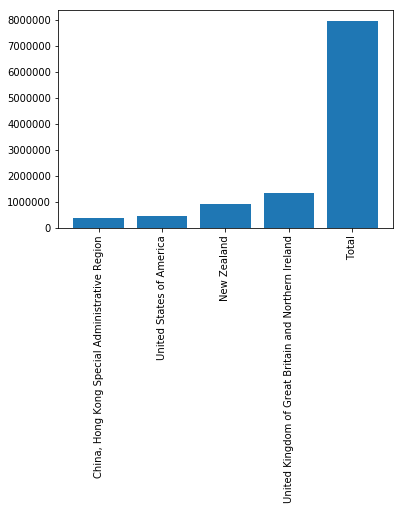

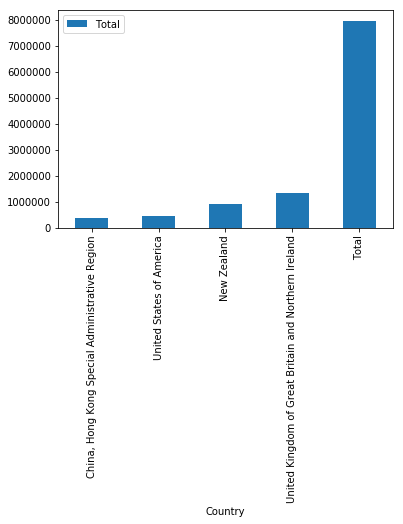

In [8]:
# Plot bar chart of total no of immigrants for countires top 5 countires 
# having max no of total immigrants
data = df.sort_values(by = 'Total').tail() 
plt.bar(data.Country.values, data.Total.values)
plt.xticks(rotation = 90)

data.plot(x = 'Country', y = 'Total', kind = 'bar')

plt.show()

AreaName
Africa                              354440
Asia                               3463640
Europe                             2166780
Latin America and the Caribbean     120350
Northern America                    592060
Oceania                            1126180
World                              8106770
Name: Total, dtype: int64


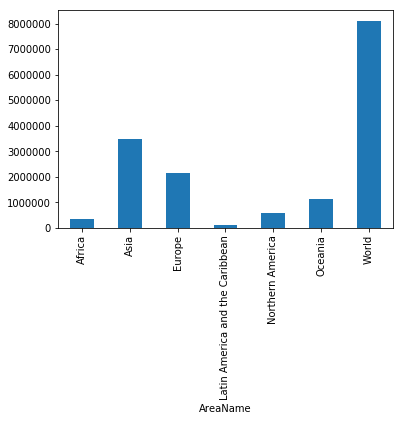

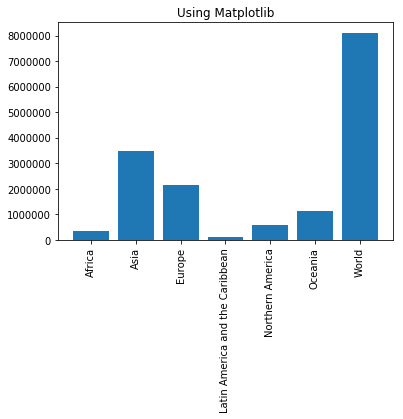

In [9]:
# Find total immigrants from each category by area name and plot barchart for each area
grp = df.groupby('AreaName')

#pandas
# get sum for Total Column on the group object => gives a series
data = grp.Total.sum()
print(data)
data.plot(kind = 'bar')
plt.show()

plt.bar(data.index, data.values)
plt.xticks(rotation = 90)
plt.title('Using Matplotlib')
plt.show()

     1980    1981    1982    1983    1984    1985    1986    1987    1988  \
0  368580  425380  390400  307140  307060  345100  393380  443240  507720   

     1989  ...    1999    2000    2001    2002    2003    2004    2005  \
0  476100  ...  579740  635120  712820  723980  776900  701980  726940   

     2006    2007     2008  
0  804420  921300  1071940  

[1 rows x 29 columns]


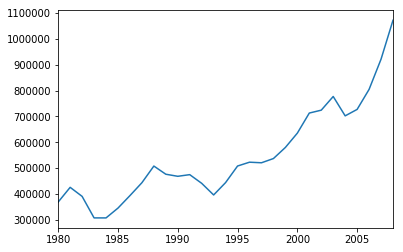

In [10]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) 
# using line plot.

#recalculate the total for each year since we dropped the total row earlier
world = df.loc[:, '1980':'2008'].sum()
print(world.to_frame().T)

world.plot(kind = 'line')

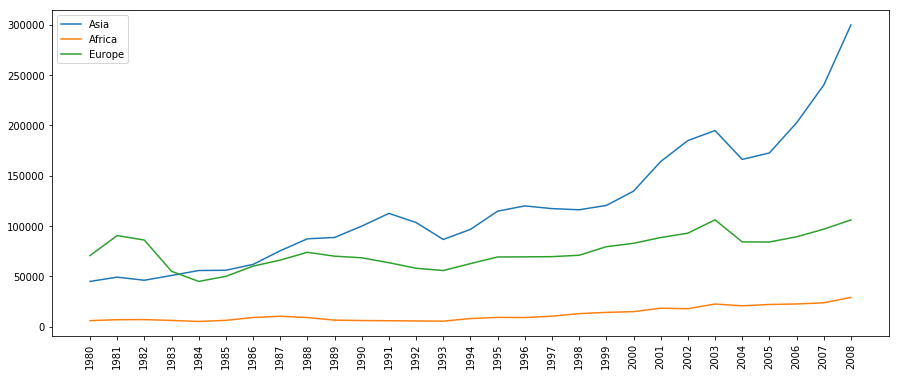

In [11]:
# Compare Immigration Trend for Asia, Africa and Europe Areas (Use Line plot).

plt.figure(figsize = (15,6))
grp = df.groupby('AreaName')

asia = grp.get_group('Asia').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Asia')

asia = grp.get_group('Africa').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Africa')

asia = grp.get_group('Europe').loc[:,'1980':'2008'].sum()
plt.plot(asia, label = 'Europe')

plt.legend()
plt.xticks(rotation = 90)
plt.show()


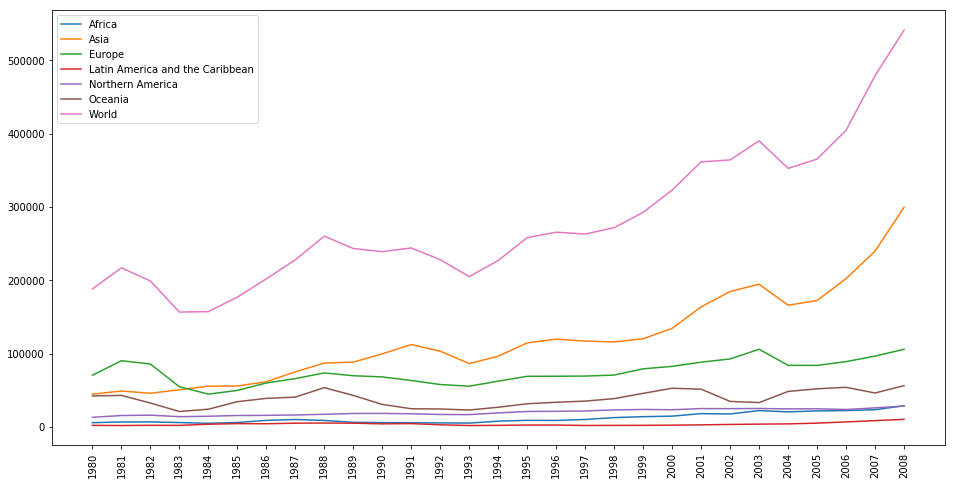

In [12]:
# Plot Total Immigrants based on DevelopmenRegion 

plt.figure(figsize=(16,8))

years = map(str, list(range(1980,2009)))
years = list(years)

res = df.groupby('AreaName')[years].sum() # group by area and take out years data
for row in res.index:
    plt.plot(res.loc[row], label = row)
    
plt.xticks(rotation = 90)
plt.legend()
plt.show()

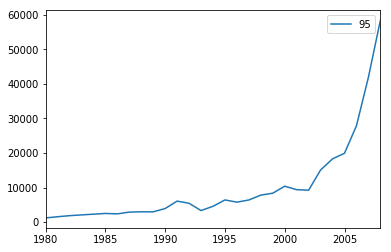

In [13]:
# Plot immigration trend for India using line plot

idx = df.index[df.Country == 'India']
data = df.loc[idx].loc[:, '1980': '2008'].T
data.plot(kind = 'line')
plt.show()


<Figure size 1152x720 with 0 Axes>

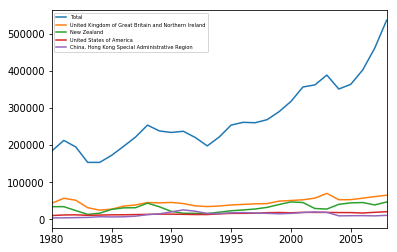

In [14]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot

plt.figure(figsize=(16,10))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']


df1 = pd.DataFrame(values.T)
df1.columns = label


df1.plot(kind = 'line')
plt.legend(fontsize=5)
plt.show()

<Figure size 1152x360 with 0 Axes>

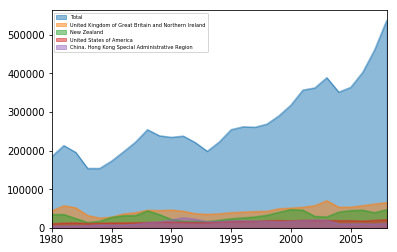

In [15]:
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(16,5))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']

# build a dataframe to represent Data
df1 = pd.DataFrame(values.T)
df1.columns = label


df1.plot(kind = 'area', stacked = False, alpha = 0.5)
plt.legend(fontsize=5)
plt.show()

<Figure size 1152x360 with 0 Axes>

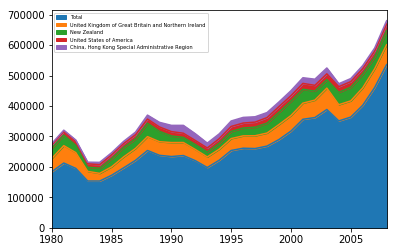

In [16]:
# Compare Immigration Trend for top-5 countires using stacked area plot
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(16,5))
data = df.sort_values(by = 'Total', ascending= False).head()
label = data.Country
values = data.loc[:,'1980':'2008']


df1 = pd.DataFrame(values.T)
df1.columns = label

df1.plot(kind = 'area', stacked = True)
plt.legend(fontsize=5)
plt.show()